<a href="https://colab.research.google.com/github/yovitafarah/UAS_PCVK_LILI_YOVITA/blob/main/rice_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

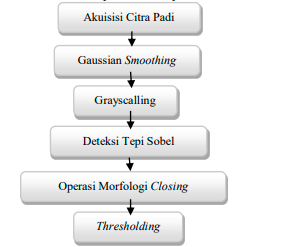

cek sini : [ilkom](https://ilkom.unnes.ac.id/snik/prosiding/2016/16.%20SNIK_339_Identifikasi%20Penyakit%20Padi.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import log10, sqrt
from PIL import Image
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# direktori data training
Images = '/content/drive/MyDrive/Projek PCVK/rice/rice_leaf_diseases'

# List folder
os.listdir(Images)

['Bacterial leaf blight', 'Leaf smut', 'Brown spot']

In [ ]:
# simpan gambar ke leaf_smut untuk kategori leaf smut
img_leafsmut = []
for img_smut in glob.glob('/content/drive/MyDrive/Projek PCVK/rice/rice_leaf_diseases/Leaf smut/*'):
  n = cv2.imread(img_smut)
  img_leafsmut.append(n)

print(len(img_leafsmut))

40


In [ ]:
# simpan gambar ke bacterial untuk kategori leaf bacterial
img_bacterial = []
for img_bact in glob.glob('/content/drive/MyDrive/Projek PCVK/rice/rice_leaf_diseases/Bacterial leaf blight/*'):
  n = cv2.imread(img_bact)
  img_bacterial.append(n)

print(len(img_bacterial))

40


In [ ]:
# simpan gambar ke brown_spot untuk kategori brown spot
img_brown_spot = []
for img_brown in glob.glob('/content/drive/MyDrive/Projek PCVK/rice/rice_leaf_diseases/Brown spot/*'):
  n = cv2.imread(img_brown)
  img_brown_spot.append(n)
print(len(img_brown_spot))

40


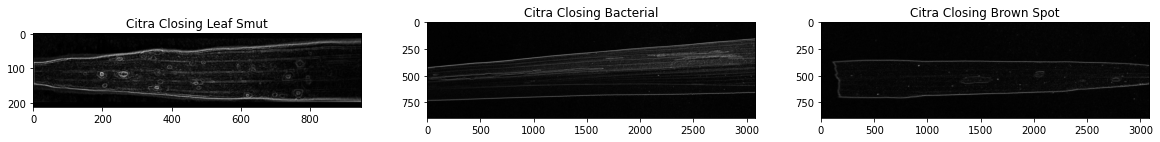

897


In [ ]:
# beri gaussian smoothing u/ memperbaiki kualitas citra
# ubah citra ke grayscale
leafsmut_gaussian = []
bacterial_gaussian = []
brownspot_gaussian = []

for i in range(len(img_leafsmut)):
  leafsmut_gaussian = cv2.GaussianBlur(img_leafsmut[i],(3,3),0)
  gray_leafsmut = cv2.cvtColor(leafsmut_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  smut_sobelx = cv2.Sobel(gray_leafsmut, cv2.CV_64F, 1, 0, ksize=3)
  smut_sobely = cv2.Sobel(gray_leafsmut, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  smut_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(smut_sobelx), 0.5, cv2.convertScaleAbs(smut_sobely), 0.5, 0)


for i in range(len(img_bacterial)):
  bacterial_gaussian = cv2.GaussianBlur(img_bacterial[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(bacterial_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  bact_sobelx = cv2.Sobel(gray_bacterial, cv2.CV_64F, 1, 0, ksize=3)
  bact_sobely = cv2.Sobel(gray_bacterial, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  bact_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(bact_sobelx), 0.5, cv2.convertScaleAbs(bact_sobely), 0.5, 0)

for i in range(len(img_brown_spot)):
  brownspot_gaussian = cv2.GaussianBlur(img_brown_spot[i],(3,3),0)
  gray_brownspot = cv2.cvtColor(brownspot_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  brownspot_sobelx = cv2.Sobel(gray_brownspot, cv2.CV_64F, 1, 0, ksize=3)
  brownspot_sobely = cv2.Sobel(gray_brownspot, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  brownspot_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(brownspot_sobelx), 0.5, cv2.convertScaleAbs(brownspot_sobely), 0.5, 0)

f, axarr = plt. subplots(1,3,figsize=(20,20))
plt.subplot(131),plt.imshow(smut_sobelxy, cmap = 'gray'), plt.title('Citra Closing Leaf Smut')
plt.subplot(132),plt.imshow(bact_sobelxy,cmap = 'gray'), plt.title('Citra Closing Bacterial')
plt.subplot(133),plt.imshow(brownspot_sobelxy,cmap = 'gray'), plt.title('Citra Closing Brown Spot')
plt.show()

print(len(bact_sobelxy))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f50e18de2d0>,
 Text(0.5, 1.0, 'Citra Closing Brown Spot'))

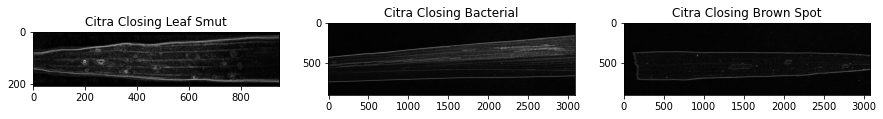

In [ ]:
#Operasi Morfologi – Closing

# leaf smut

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(smut_sobelxy, kernel, iterations=1)
closing_smut = cv2.erode(dilation, kernel, iterations=1)

# bacterial
dilation = cv2.dilate(bact_sobelxy, kernel, iterations=1)
closing_bacterial = cv2.erode(dilation, kernel, iterations=1)

# brown spot
dilation = cv2.dilate(brownspot_sobelxy, kernel, iterations=1)
closing_brown = cv2.erode(dilation, kernel, iterations=1)

f, axarr = plt. subplots(1,3,figsize=(15,15))
plt.subplot(131),plt.imshow(closing_smut, cmap = 'gray'), plt.title('Citra Closing Leaf Smut')
plt.subplot(132),plt.imshow(closing_bacterial, cmap = 'gray'), plt.title('Citra Closing Bacterial')
plt.subplot(133),plt.imshow(closing_brown, cmap = 'gray'), plt.title('Citra Closing Brown Spot')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f50e18538d0>,
 Text(0.5, 1.0, 'Citra Thresholding Brown Spot'))

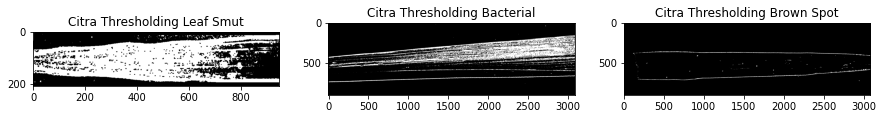

In [ ]:
# thresholding
# img_smut = cv2.cvtColor(img_leafsmut[0], cv2.COLOR_BGR2RGB)
# img_smutgray = cv2.cvtColor(img_smut,cv2.COLOR_BGR2GRAY)

# img = cv2.cvtColor(img_bacterial[2], cv2.COLOR_BGR2RGB)
# img_bactgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# img = cv2.cvtColor(img_brown_spot[0], cv2.COLOR_BGR2RGB)
# img_browngray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh = 15
ret,th1 = cv2.threshold(closing_smut,thresh,255,cv2.THRESH_BINARY)
thresh = 20
ret,th2 = cv2.threshold(closing_bacterial,thresh,255,cv2.THRESH_BINARY)
thresh = 35
ret,th3 = cv2.threshold(closing_brown,thresh,255,cv2.THRESH_BINARY)

# ret1, th1 = cv2.threshold(img_smutgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret1, th2 = cv2.threshold(img_bactgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret1, th3 = cv2.threshold(img_browngray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (15,15))
plt.subplot(131),plt.imshow(th1, 'gray'), plt.title('Citra Thresholding Leaf Smut')
plt.subplot(132),plt.imshow(th2, 'gray'), plt.title('Citra Thresholding Bacterial')
plt.subplot(133),plt.imshow(th3, 'gray'), plt.title('Citra Thresholding Brown Spot')